In [16]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv("UCI HAR Dataset/train/X_train.txt", sep = "\s+", header= None)
dataTest = pd.read_csv("UCI HAR Dataset/train/X_train.txt", sep ="\s+",  header= None)
labels_true = pd.read_csv("UCI HAR Dataset/features.txt",sep = "\s+", header= None)
df.shape

(7352, 561)

In [18]:
encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in dataTest.columns:
    dataTest[col]= encoder.fit_transform(dataTest[col])

X_features = dataTest.iloc[:,0:]
y_label = dataTest.iloc[:, 0]

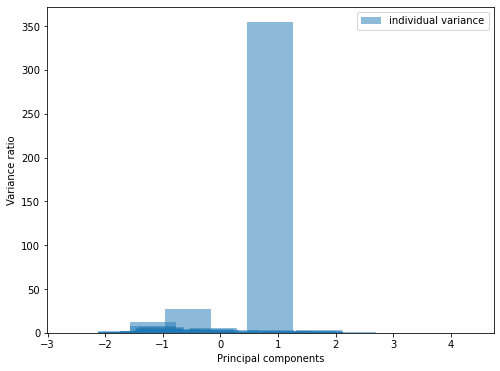

In [19]:
X_features = StandardScaler().fit_transform(X_features)
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_
# print(pca_variance)
plt.figure(figsize=(8, 6))
plt.bar(X_features[0], pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4.7, min_samples=35).fit(df)

In [21]:
df['DBSCAN_labels']=dbscan.labels_ 

In [22]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

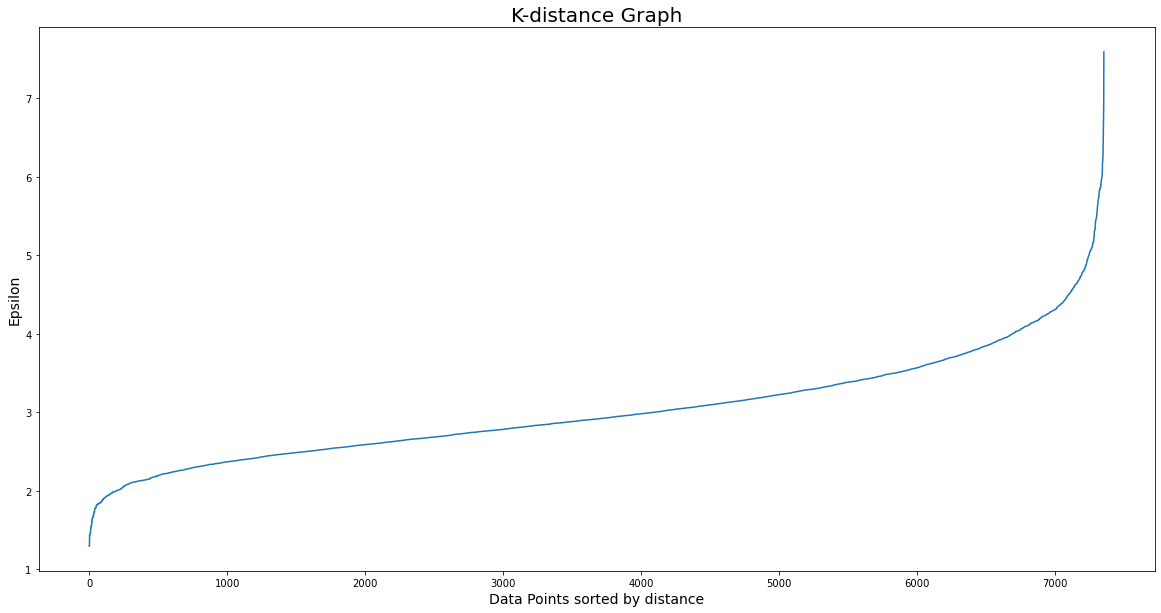

In [23]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [34]:
dbscan2 = DBSCAN(eps=2.1, min_samples=35).fit(X_features)

In [35]:
dataTest['DBSCAN_labels']=dbscan2.labels_ 

Estimated number of clusters: 4
Estimated number of noise points: 619


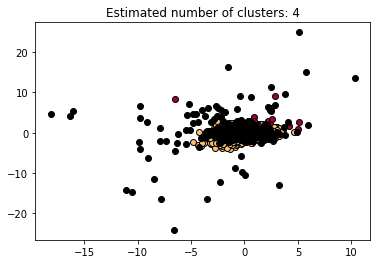

In [42]:
db = df #N(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db['DBSCAN_labels'], dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db['DBSCAN_labels']
X = db.iloc[:,0:]
X = StandardScaler().fit_transform(db)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 1
Estimated number of noise points: 7352


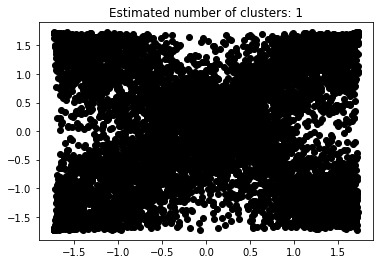

In [41]:
db = dataTest
core_samples_mask = np.zeros_like(db['DBSCAN_labels'], dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db['DBSCAN_labels']
X = StandardScaler().fit_transform(X_features)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()